In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import cv2

In [3]:
import pathlib
data_dir = r"/root/data_Camera/20classWooden_1/"
type(data_dir)


str

In [4]:
print(data_dir)

/root/data_Camera/20classWooden_1/


In [5]:
data_dir = pathlib.Path(data_dir)
type(data_dir)

pathlib.PosixPath

In [6]:
print(data_dir)

/root/data_Camera/20classWooden_1


/root/data_Camera/20classWooden_1/7094Z_W_E_0/7094Z_W_E_0_165123763593117_imgaug.jpg


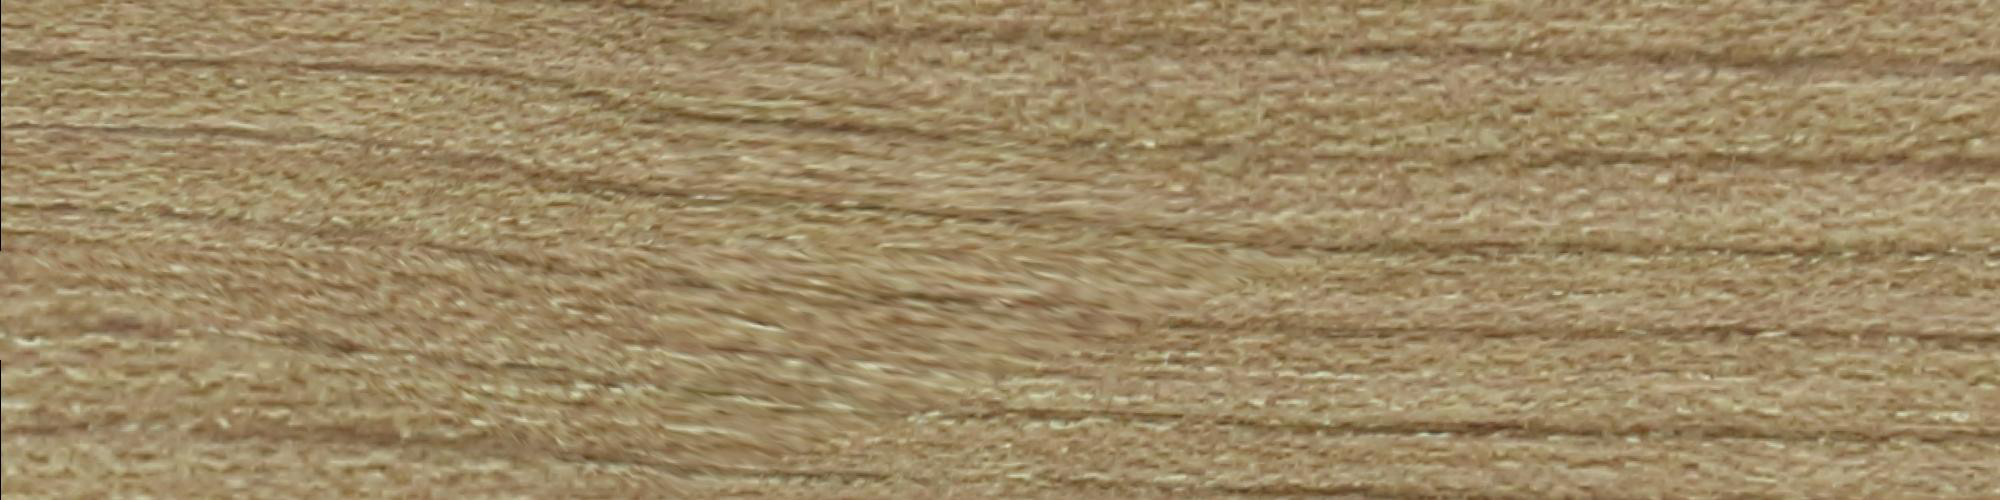

In [7]:
#roses = list(data_dir.glob('roses/*'))
#print(roses[0])
#PIL.Image.open(str(roses[0]))
rock = list(data_dir.glob('7094Z_W_E_0/*'))
print(rock[0])
PIL.Image.open(str(rock[0]))

In [8]:
img_height, img_width = 224,224
batch_size = 32
trains_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = "training",
  seed = 42,
  label_mode = 'categorical',
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 4200 files belonging to 20 classes.
Using 3360 files for training.


In [9]:
file_paths = trains_ds.file_paths
print(file_paths)
fp = open("/root/resnet_EB_Wall_20class/train_ds.csv", "a+")
print(file_paths, file=fp)
fp.close()

['/root/data_Camera/20classWooden_1/4791B_W_E_0/4791B_W_E_0_1651237868346156_imgaug.jpg', '/root/data_Camera/20classWooden_1/4955B_W_NE_0/4955B_W_NE_0_1651237736137186_imgaug.jpg', '/root/data_Camera/20classWooden_1/4791B_W_E_0/4791B_W_E_0_1651237868346142_imgaug.jpg', '/root/data_Camera/20classWooden_1/5273B_W_E_5/5273B_W_E_5_16512377198217_imgaug.jpg', '/root/data_Camera/20classWooden_1/3827B_W_E_1/3827B_W_E_1_1651237767992179_imgaug.jpg', '/root/data_Camera/20classWooden_1/4791B_W_E_0/4791B_W_E_0_165123786834652_imgaug.jpg', '/root/data_Camera/20classWooden_1/7094Z_W_E_0/7094Z_W_E_0_1651237635931122_imgaug.jpg', '/root/data_Camera/20classWooden_1/3827B_W_E_1/3827B_W_E_1_165123776799238_imgaug.jpg', '/root/data_Camera/20classWooden_1/5273B_W_E_5/5273B_W_E_5_16512377198215_imgaug.jpg', '/root/data_Camera/20classWooden_1/5115B_W_NE_1/5115B_W_NE_1_165123788445144_imgaug.jpg', '/root/data_Camera/20classWooden_1/4552B_W_E_3/4552B_W_E_3_165123778454181_imgaug.jpg', '/root/data_Camera/20cla

In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    label_mode = 'categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 4200 files belonging to 20 classes.
Using 840 files for validation.


In [11]:
file_paths = val_ds.file_paths
print(file_paths)
fp = open("/root/resnet_EB_Wall_20class/val_ds.csv", "a+")
print(file_paths, file=fp)
fp.close()

['/root/data_Camera/20classWooden_1/5393B_W_E_0/5393B_W_E_0_1651237669704166_imgaug.jpg', '/root/data_Camera/20classWooden_1/5273B_W_E_5/5273B_W_E_5_1651237719821135_imgaug.jpg', '/root/data_Camera/20classWooden_1/7094Z_W_E_0/7094Z_W_E_0_1651237635931204_imgaug.jpg', '/root/data_Camera/20classWooden_1/5393B_W_E_0/5393B_W_E_0_165123766970461_imgaug.jpg', '/root/data_Camera/20classWooden_1/5273B_W_E_5/5273B_W_E_5_165123771982166_imgaug.jpg', '/root/data_Camera/20classWooden_1/5273B_W_E_5/5273B_W_E_5_165123771982158_imgaug.jpg', '/root/data_Camera/20classWooden_1/7090Z_W_E_0/7090Z_W_E_0_1651237752253173_imgaug.jpg', '/root/data_Camera/20classWooden_1/5180B_W_E_0/5180B_W_E_0_165123793429638_imgaug.jpg', '/root/data_Camera/20classWooden_1/3817B_W_NE_0/3817B_W_NE_0_1651237917427107_imgaug.jpg', '/root/data_Camera/20classWooden_1/5115B_W_NE_1/5115B_W_NE_1_16512378844517_imgaug.jpg', '/root/data_Camera/20classWooden_1/4917B_W_NE_0/4917B_W_NE_0_1651237901225148_imgaug.jpg', '/root/data_Camera/2

In [13]:
class_names = trains_ds.class_names
print(class_names)

fp = open("/root/resnet_EB_Wall_20class/class_names.csv", "a+")
print(class_names, file=fp)
fp.close()

['3817B_W_NE_0', '3827B_W_E_1', '4519B_W_E_0', '4538B_W_E_0', '4552B_W_E_3', '4586B_W_E_1', '4648B_W_E_0', '4669B_W_E_1', '4791B_W_E_0', '4917B_W_NE_0', '4955B_W_NE_0', '5115B_W_NE_1', '5132B_W_E_0', '5180B_W_E_0', '5206B_W_E_1', '5273B_W_E_5', '5340B_W_E_0', '5393B_W_E_0', '7090Z_W_E_0', '7094Z_W_E_0']


In [14]:
resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top=False, 
                                                  input_shape=(224,224,3),
                                                  pooling='avg', 
                                                  classes = 20, 
                                                  weights = 'imagenet')

for layer in pretrained_model.layers: 
    layer.trainable=False
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(20,activation='softmax'))


In [15]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 20)                10260     
Total params: 24,647,060
Trainable params: 1,059,348
Non-trainable params: 23,587,712
_________________________________________________________________


In [16]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
epochs = 5
history= resnet_model.fit(
    trains_ds,
    validation_data=val_ds,
    epochs=epochs)


Epoch 1/5
105/105 [==============================] - 145s 1s/step - loss: 1.0322e-04 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9964
Epoch 2/5
105/105 [==============================] - 145s 1s/step - loss: 8.6363e-05 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9964
Epoch 3/5
105/105 [==============================] - 145s 1s/step - loss: 7.3466e-05 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 0.9964
Epoch 4/5
105/105 [==============================] - 146s 1s/step - loss: 6.3040e-05 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 0.9964
Epoch 5/5
105/105 [==============================] - 147s 1s/step - loss: 5.3133e-05 - accuracy: 1.0000 - val_loss: 0.0116 - val_accuracy: 0.9964


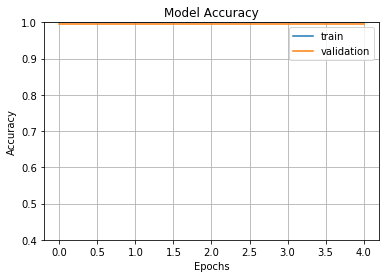

In [19]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

In [20]:
import cv2
image = cv2.imread(str(rock[0]))
image_resized = cv2.resize(image,(img_height,img_width))
print(img_height)
print(img_width)
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

224
224
(1, 224, 224, 3)


In [21]:
pred=resnet_model.predict(image)
print(pred)

[[8.6105847e-06 6.4603717e-07 4.3888310e-08 3.1363410e-08 4.7587434e-07
  1.4997445e-07 3.2128187e-04 1.4793975e-06 3.8616774e-10 2.0089979e-07
  1.9075489e-05 3.9881807e-06 3.2612490e-05 1.9153081e-04 8.0092514e-07
  3.6767059e-08 1.8663807e-03 1.3253812e-06 9.6834087e-01 2.9210478e-02]]


In [22]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is 7090Z_W_E_0


In [23]:
def get_name_list(filepath):                #获取各个类别的名字
    pathDir =  os.listdir(filepath)
    out = []
    for allDir in pathDir:
        if os.path.isdir(os.path.join(filepath,allDir)):
            #child = allDir()    # .decode('gbk')是解决中文显示乱码问题
            out.append(allDir)
    return out

In [24]:
class_name= sorted(get_name_list(data_dir))
#class_name = class_name.sort()
print(class_name)

['3817B_W_NE_0', '3827B_W_E_1', '4519B_W_E_0', '4538B_W_E_0', '4552B_W_E_3', '4586B_W_E_1', '4648B_W_E_0', '4669B_W_E_1', '4791B_W_E_0', '4917B_W_NE_0', '4955B_W_NE_0', '5115B_W_NE_1', '5132B_W_E_0', '5180B_W_E_0', '5206B_W_E_1', '5273B_W_E_5', '5340B_W_E_0', '5393B_W_E_0', '7090Z_W_E_0', '7094Z_W_E_0']


In [25]:
output1=np.argmax(pred)
print(output1)

18


In [26]:
print(output1, class_name[output1])

18 7090Z_W_E_0


In [27]:
N = 20
pred_list = []
for row in pred:
    pred_list.append(row.argsort()[-N:][::-1])  #获取最大的N个值的下标
    #print(pred_list)
pred_array = np.array(pred_list)
print(type(pred_list))

print(pred_array)
print(type(pred_list))

<class 'list'>
[[18 19 16  6 13 12 10  0 11  7 17 14  1  4  9  5  2 15  3  8]]
<class 'list'>


In [28]:
print(pred_array[0][0])
print(pred_list[0])

18
[18 19 16  6 13 12 10  0 11  7 17 14  1  4  9  5  2 15  3  8]


In [34]:
pred=resnet_model.predict(image)
print(pred)
print(type(pred))
pred_1=pred.tolist()

[[8.6105847e-06 6.4603717e-07 4.3888310e-08 3.1363410e-08 4.7587434e-07
  1.4997445e-07 3.2128187e-04 1.4793975e-06 3.8616774e-10 2.0089979e-07
  1.9075489e-05 3.9881807e-06 3.2612490e-05 1.9153081e-04 8.0092514e-07
  3.6767059e-08 1.8663807e-03 1.3253812e-06 9.6834087e-01 2.9210478e-02]]
<class 'numpy.ndarray'>


In [35]:
for i in range(len(pred_array)):
    for j in range(len(pred_array[0])):
        #print(pred_array[i][j])
        k=pred_array[i][j]
        #print('top=',j,pred_array[i][j],class_name[pred_array[i][j]],pred_1[pred_array[i][j]])
        print('top=',j,pred_array[i][j],class_name[k],pred_1[0][k])
        #fp = open("/root/resnet_EB_Wall/result.csv", "a+")
        #print('top=',j,pred_array[i][j],class_name[k],pred_1[0][k], file=fp)
        #fp.close()

top= 0 3 4538B_W_E_0 3.1363409647156004e-08
top= 1 15 5273B_W_E_5 3.6767058730902136e-08
top= 2 2 4519B_W_E_0 4.3888309875228515e-08
top= 3 5 4586B_W_E_1 1.4997445418885036e-07
top= 4 9 4917B_W_NE_0 2.0089979102522193e-07
top= 5 4 4552B_W_E_3 4.7587434437446063e-07
top= 6 1 3827B_W_E_1 6.460371650973684e-07
top= 7 14 5206B_W_E_1 8.009251359908376e-07
top= 8 17 5393B_W_E_0 1.3253811630420387e-06
top= 9 7 4669B_W_E_1 1.4793974969506962e-06
top= 10 11 5115B_W_NE_1 3.988180651504081e-06
top= 11 0 3817B_W_NE_0 8.610584700363688e-06
top= 12 10 4955B_W_NE_0 1.9075489035458304e-05
top= 13 12 5132B_W_E_0 3.261249003116973e-05
top= 14 13 5180B_W_E_0 0.00019153080938849598
top= 15 6 4648B_W_E_0 0.0003212818701285869
top= 16 16 5340B_W_E_0 0.0018663806840777397
top= 17 19 7094Z_W_E_0 0.02921047806739807
top= 18 18 7090Z_W_E_0 0.9683408737182617


In [30]:
N = 5
pred_list = []
for row in pred:
    pred_list.append(row.argsort()[1:21:1])  #获取最大的N个值的下标
    #print(pred_list)
pred_array = np.array(pred_list)
print(type(pred_list))

print(pred_array)
print(type(pred_list))

<class 'list'>
[[ 3 15  2  5  9  4  1 14 17  7 11  0 10 12 13  6 16 19 18]]
<class 'list'>


In [40]:
for i in range(len(pred_array)):
    for j in range(len(pred_array[0])):
        #print(pred_array[i][j])
        print('top=',j,pred_array[i][j],class_name[pred_array[i][j]],pred[i][j])

top= 0 1115 7343B_O_E_0 5.103452e-15
top= 1 58 3627B_M_NE_7 2.150391e-19
top= 2 1180 7458B_O_E_0 1.2150982e-10
top= 3 378 5139B_M_NE_7 2.2691328e-10
top= 4 508 5392B_O_NE_1 4.6303668e-20
top= 5 41 3527B_W_E_1 1.823896e-23
top= 6 615 5565B_M_NE_7 5.4283413e-18
top= 7 756 5851B_O_E_1 6.271507e-17
top= 8 851 5998B_O_E_0 1.1491029e-10
top= 9 842 5983B_O_None 3.675981e-09
top= 10 991 7157B_O_NE_0 8.797854e-21
top= 11 147 3883B_W_E_1 4.427148e-21
top= 12 266 4756B_O_E_0 1.3206423e-11
top= 13 699 5755B_R_NE_7 1.1276587e-12
top= 14 839 5980B_O_None 1.3170702e-11
top= 15 633 5595B_O_None 8.320065e-14
top= 16 1093 7302B_C_E_0 3.040603e-13
top= 17 314 4863B_C_E_1 2.672743e-10
top= 18 1105 7321B_O_E_1 0.0002171291
top= 19 1138 7377B1_O_NE_7 3.9508353e-17


In [28]:
data_dir1 = r"/root/data_Camera/samples"
type(data_dir1)

str

In [29]:
print(data_dir1)

/root/data_Camera/samples


In [30]:
data_dir = pathlib.Path(data_dir1)
type(data_dir1)

str

In [31]:
import pathlib
data_dir1 = pathlib.Path(data_dir1)
type(data_dir1)

pathlib.PosixPath

In [32]:
rock = list(data_dir1.glob('wooden/*'))
print(rock[0])
PIL.Image.open(str(rock[0]))

/root/data_Camera/samples/wooden/U4909B_W_E.png


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [33]:
image = cv2.imread(str(rock[0]))
image_resized = cv2.resize(image,(img_height,img_width))
print(img_height)
print(img_width)
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

224
224
(1, 224, 224, 3)


In [34]:
pred=resnet_model.predict(image)
print(pred)

[[5.1034519e-15 2.1503909e-19 1.2150982e-10 ... 1.4059226e-24
  8.3574136e-13 9.9649291e-12]]


In [35]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is 4922B_W_E_0


In [31]:
import keras
from keras.models import load_model
#保持模型图和权重
# 保存训练好的model为hdf5文件
resnet_model.save('/root/resnet_EB_Wall_20class/model/my_model_newPic.h5')  



/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [37]:
# 重新加载模型
model = load_model('/root/resnet_EB_Wall/model/my_model.h5')

In [32]:
# 只保存模型权重
resnet_model.save_weights('/root/resnet_EB_Wall_20class/model/my_model_newPic_weights.h5')



In [ ]:
# 加载模型权重，这里加载权重前需要重新构建model的模型图
model = Model(inputs=..., outputs=...)
model.load_weights('/root/resnet_EB_Wall/model/my_model_weights.h5')
